**Predicting life expectancies of countries based on social services**

**Introduction**

In this exploratory data analysis, we aim to explore the relationship between life expectancy and social services across various countries. Life expectancy is a critical metric reflecting the overall health and well-being of a population, while social services encompass a wide range of factors such as healthcare access, education, economic stability, and social support systems.

Understanding how these social services impact life expectancy can provide valuable insights for policymakers, healthcare professionals, and organizations striving to improve public health outcomes. Through data analysis and predictive modeling techniques, we will investigate patterns, correlations, and predictive capabilities to gain deeper insights into this important relationship.

The dataset used for this analysis contains information on key social service indicators and life expectancy statistics for multiple countries for the year 2023.Using visualization tools and predictive algorithms, we will uncover meaningful patterns and build a predictive model to estimate life expectancy based on various social service factors.

The dataset used for this analysis is the Global Country Information Dataset 2023, taken from Kaggle.

https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [2]:
# load the necessary libraries and set seed to begin
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(1689)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Preliminary exploratory data analysis**

In [3]:
# data is a .csv file so it can be read using read_csv
data <- read_csv("Data/world-data-2023.csv")
data

Rows: 195 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Country, Abbreviation, Agricultural Land( %), Capital/Major City, ...
dbl  (9): Birth Rate, Calling Code, Fertility Rate, Infant mortality, Life e...
num  (7): Density
(P/Km2), Land Area(Km2), Armed Forces size, Co2-Emissions,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,⋯,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,60,AF,58.10%,652230,323000,32.49,93,Kabul,8672,⋯,78.40%,0.28,38041754,48.90%,9.30%,71.40%,11.12%,9797273,33.93911,67.709953
Albania,105,AL,43.10%,28748,9000,11.78,355,Tirana,4536,⋯,56.90%,1.20,2854191,55.70%,18.60%,36.60%,12.33%,1747593,41.15333,20.168331
Algeria,18,DZ,17.40%,2381741,317000,24.28,213,Algiers,150006,⋯,28.10%,1.72,43053054,41.20%,37.20%,66.10%,11.70%,31510100,28.03389,1.659626
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,56,YE,44.60%,527968,40000,30.45,967,Sanaa,10609,⋯,81.00%,0.31,29161922,38.00%,NA,26.60%,12.91%,10869523,15.55273,48.51639
Zambia,25,ZM,32.10%,752618,16000,36.19,260,Lusaka,5141,⋯,27.50%,1.19,17861030,74.60%,16.20%,15.60%,11.43%,7871713,-13.13390,27.84933
Zimbabwe,38,ZW,41.90%,390757,51000,30.68,263,Harare,10983,⋯,25.80%,0.21,14645468,83.10%,20.70%,31.60%,4.95%,4717305,-19.01544,29.15486


Upon looking at the data, it can be seen that the column names have spaces in them. The following code removes these spaces and replaces them with an underscore, and also removes the $ and % symbol as well as converts to a number.

In [19]:
data_cleaned <- rename(data, life_expectancy = "Life expectancy", education_enrollment = "Gross tertiary education enrollment (%)", physicians_per_thousand = "Physicians per thousand", min_wage = "Minimum wage")|>
mutate(education_enrollment = substr(education_enrollment, 1, nchar(education_enrollment)-1)) |>
mutate(education_enrollment = as.double(education_enrollment))|>
mutate(min_wage = substr(min_wage, 2, nchar(min_wage))) |>
mutate(min_wage = as.double(min_wage)) |>
select(min_wage, life_expectancy, physicians_per_thousand, education_enrollment)
data_cleaned

min_wage,life_expectancy,physicians_per_thousand,education_enrollment
<dbl>,<dbl>,<dbl>,<dbl>
0.43,64.5,0.28,9.7
1.12,78.5,1.20,55.0
0.95,76.7,1.72,51.4
⋮,⋮,⋮,⋮
NA,66.1,0.31,10.2
0.24,63.5,1.19,4.1
NA,61.2,0.21,10.0


Before starting to visualize the data, let us first split it into training and testing, using a split of 0.75 and setting strata to life_expectancy.
This ensures that life_expectancy is evenly distributed among the two splits.

In [21]:
data_split <- initial_split(data_cleaned, prop = 0.75, strata = life_expectancy)
data_training <- training(data_split)
data_testing <- testing(data_split)

Once we have seleced the predictors of social services in the countries, let us do a preliminary data visualization to see what the correlation with
life expectancy looks like.

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 34 rows containing missing values (`geom_point()`).”


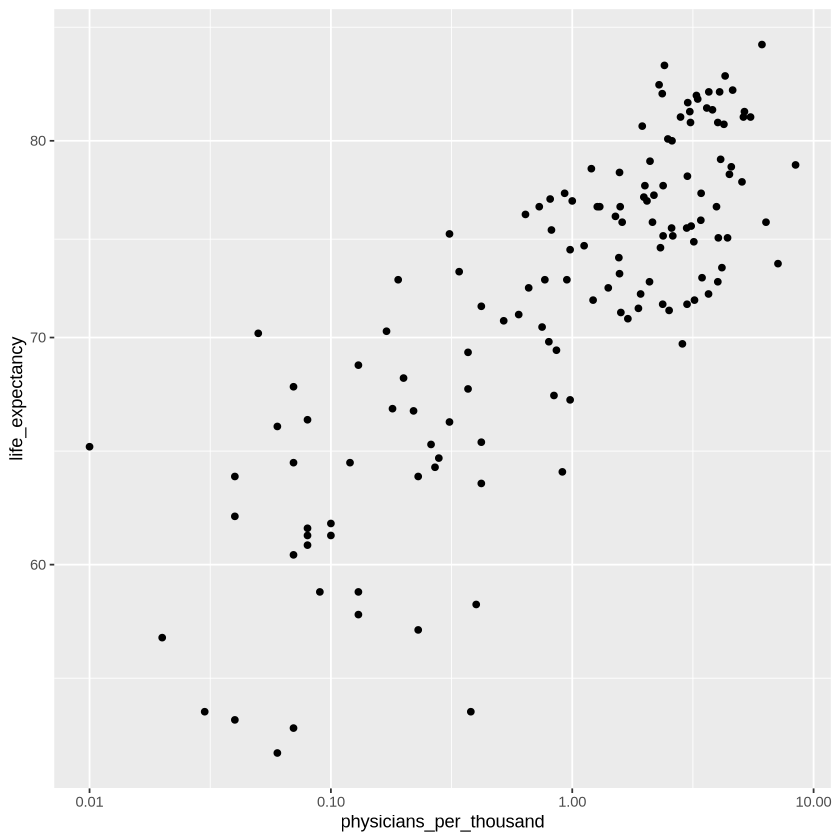

Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


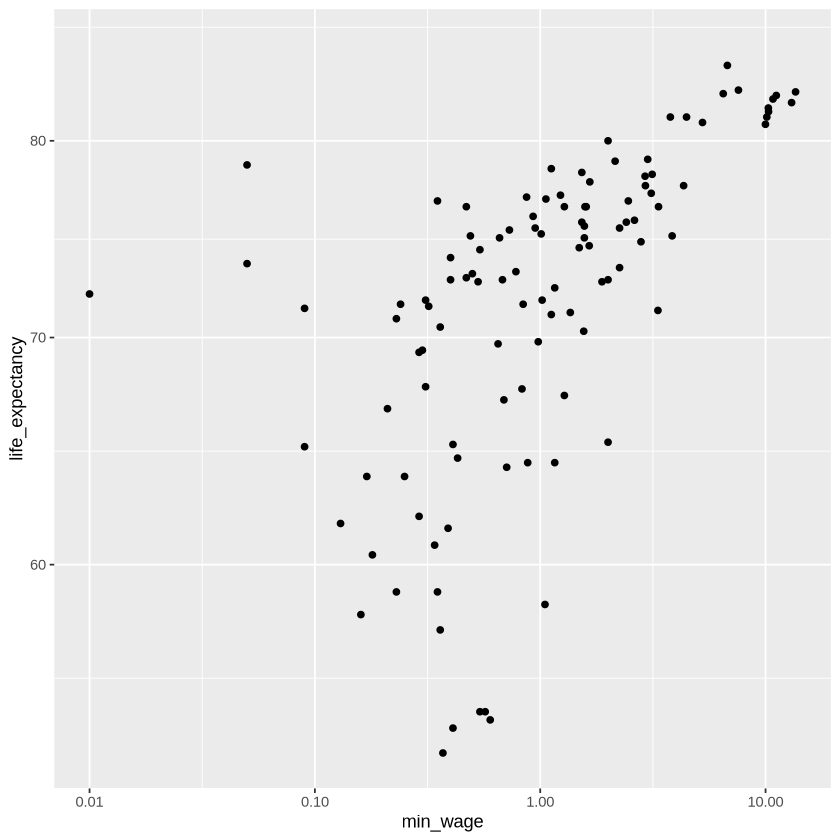

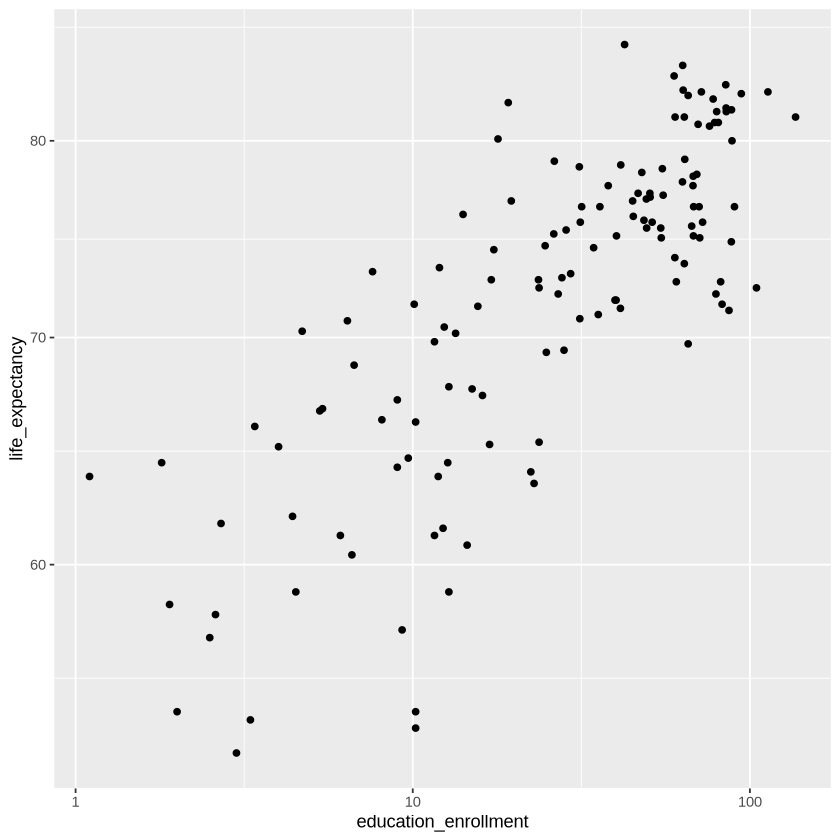

In [22]:
physicians_plot <- ggplot(data_training, aes(x = physicians_per_thousand, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
physicians_plot
min_wage_plot <- ggplot(data_training, aes(x = min_wage, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
min_wage_plot
education_enrollment_plot <- ggplot(data_training, aes(x = education_enrollment, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
education_enrollment_plot

We see a positive linear relationship of moderate strength with all three predictors.

**Methods**
Regression model where life expectancy is predicted based on education_enrollment, minimum wage, and physicians per thousand

**Expected outcomes and significance**

What do you expect to find? -   

What impact could such findings hae? -   


?
What future questions could this lead t  o?